In [0]:
%tensorflow_version 1.x 
import os
import shutil
import pandas as pd
import numpy as np
import cv2
import tqdm
from keras.utils import np_utils

TensorFlow 1.x selected.


Using TensorFlow backend.


Please paste the link to the zipped Computer Vision folder here 

In [0]:
dataset_path = "path/to/Computer Vision.zip"

Unpacking the data into data folder


In [0]:
shutil.unpack_archive(dataset_path, "data/")

updating the link to the dataset

In [0]:
dataset_path = "data/Computer Vision/"

read the dataset into memory

In [0]:
train_df = pd.read_csv(dataset_path + "train.csv")
test_df = pd.read_csv(dataset_path + "test.csv")

sanity check

In [0]:
print(train_df.head())
print(test_df.head())

            Image   Class
0   image7042.jpg    Food
1   image3327.jpg    misc
2  image10335.jpg  Attire
3   image8019.jpg    Food
4   image2128.jpg  Attire
           Image
0  image4703.jpg
1  image8371.jpg
2  image8308.jpg
3  image6299.jpg
4  image2364.jpg


Load the images <br>


The test images are also in train.csv file
So i am ignoring those rows

In [0]:
train = []
train_label = []
not_found = []
for row in tqdm.tqdm(train_df.index):
  # print(train_df['Image'][row])
  image = cv2.imread(dataset_path + "Train/" + train_df['Image'][row])
  image = np.asarray(image)  
  if image.shape == ():
    not_found.append(train_df['Image'][row])
    continue
  image = cv2.resize(image, (64,64))
  train.append(image)
  train_label.append(train_df['Class'][row])



  0%|          | 0/5983 [00:00<?, ?it/s]

  7%|▋         | 443/5983 [00:00<00:01, 4423.44it/s]

 15%|█▌        | 901/5983 [00:00<00:01, 4467.80it/s]

 23%|██▎       | 1382/5983 [00:00<00:01, 4564.43it/s]

 31%|███       | 1863/5983 [00:00<00:00, 4634.44it/s]

 39%|███▉      | 2355/5983 [00:00<00:00, 4714.89it/s]

 47%|████▋     | 2828/5983 [00:00<00:00, 4719.30it/s]

 55%|█████▌    | 3300/5983 [00:00<00:00, 4716.61it/s]

 63%|██████▎   | 3775/5983 [00:00<00:00, 4723.90it/s]

 71%|███████   | 4228/5983 [00:00<00:00, 4662.26it/s]

100%|██████████| 5983/5983 [00:01<00:00, 5530.26it/s]


In [0]:
print(len(not_found)) 
print(len(test_df))

983
983


Load the test images

In [0]:
test = []
not_found = []
for row in tqdm.tqdm(test_df.index):
  image = cv2.imread(dataset_path + "Test/" + test_df['Image'][row])
  image = np.asarray(image)  
  if image.shape == ():
    not_found.append(test_df['Image'][row])
    continue
  image = cv2.resize(image, (64,64))
  test.append(image)



  0%|          | 0/983 [00:00<?, ?it/s]

 49%|████▊     | 477/983 [00:00<00:00, 4764.04it/s]

100%|██████████| 983/983 [00:00<00:00, 4786.79it/s]


In [0]:
train = np.stack(train)


In [0]:
test = np.stack(test)

In [0]:
print(train.shape,test.shape)

(5000, 64, 64, 3) (983, 64, 64, 3)


In [0]:
print(set(train_label))

{'misc', 'Decorationandsignage', 'Attire', 'Food'}


Create dictionaries for labels

In [0]:
label_to_id = {'Food':0, 'Attire':1, 'Decorationandsignage':2, 'misc':3}
id_to_label = {0: 'Food', 1:'Attire',2: 'Decorationandsignage',3: 'misc'}

In [0]:
label = np.asarray([label_to_id[i] for i in train_label])

In [0]:
label.shape

(5000,)

In [0]:
print (label.shape)
label = np_utils.to_categorical(label, 4)
print (label.shape)

(5000,)
(5000, 4)


Divide the datasets into train and validation sets

In [0]:
X_train = train[:4000]
Y_train = label[:4000]
print (X_train.shape, Y_train.shape)
X_crossval = train[4000:]
Y_crossval = label[4000:]
print (X_crossval.shape, Y_crossval.shape)

(4000, 64, 64, 3) (4000, 4)
(1000, 64, 64, 3) (1000, 4)


Create the Image data generator

In [0]:
%tensorflow_version 1.x 
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.0,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(X_train)

In [0]:
%tensorflow_version 1.x 
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=5, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1335: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [0]:
%tensorflow_version 1.x 

from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , Adam
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.models import Sequential

model 1

In [0]:
%tensorflow_version 1.x 

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(64,64,3)))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='sigmoid'))

model.add(Dropout(0.4))
model.add(Dense(4 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam' ,
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 64)       

In [0]:
batch_size = 128
epochs = 30

model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])
steps_per_epoch = len(X_train) // batch_size
validation_steps = len((X_crossval, Y_crossval)) // batch_size

In [0]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    callbacks=[lr_reduce],
                    validation_data=(X_crossval, Y_crossval),
                    epochs = epochs, verbose = 2)

Epoch 1/30
 - 5s - loss: 0.5497 - acc: 0.7373 - val_loss: 0.5077 - val_acc: 0.7592
Epoch 2/30
 - 4s - loss: 0.5119 - acc: 0.7557 - val_loss: 0.4960 - val_acc: 0.7620
Epoch 3/30
 - 4s - loss: 0.4927 - acc: 0.7644 - val_loss: 0.4976 - val_acc: 0.7680
Epoch 4/30
 - 4s - loss: 0.4815 - acc: 0.7756 - val_loss: 0.4965 - val_acc: 0.7598
Epoch 5/30
 - 4s - loss: 0.4776 - acc: 0.7785 - val_loss: 0.4756 - val_acc: 0.7742
Epoch 6/30
 - 4s - loss: 0.4697 - acc: 0.7819 - val_loss: 0.4834 - val_acc: 0.7630
Epoch 7/30
 - 4s - loss: 0.4637 - acc: 0.7864 - val_loss: 0.4789 - val_acc: 0.7730
Epoch 8/30
 - 4s - loss: 0.4585 - acc: 0.7911 - val_loss: 0.4597 - val_acc: 0.7795
Epoch 9/30
 - 4s - loss: 0.4481 - acc: 0.7969 - val_loss: 0.5351 - val_acc: 0.7105
Epoch 10/30
 - 4s - loss: 0.4392 - acc: 0.8057 - val_loss: 0.5674 - val_acc: 0.6983
Epoch 11/30
 - 4s - loss: 0.4311 - acc: 0.8091 - val_loss: 0.4449 - val_acc: 0.7943
Epoch 12/30
 - 4s - loss: 0.4206 - acc: 0.8147 - val_loss: 0.4741 - val_acc: 0.7757
E

In [0]:
# history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
#                     steps_per_epoch=X_train.shape[0] // batch_size,
#                     callbacks=[lr_reduce],
#                     validation_data=(X_crossval, Y_crossval),
#                     epochs = epochs, verbose = 2)

Model 2 <br>
reducing the number of epochs as after 17 epochs the model started overfitting

In [0]:
%tensorflow_version 1.x 

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(64,64,3)))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='sigmoid'))

model.add(Dropout(0.4))
model.add(Dense(4 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam' ,
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)       

In [0]:
batch_size = 128
epochs = 17

model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])
steps_per_epoch = len(X_train) // batch_size
validation_steps = len((X_crossval, Y_crossval)) // batch_size

In [0]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    callbacks=[lr_reduce],
                    validation_data=(X_crossval, Y_crossval),
                    epochs = epochs, verbose = 2)

Epoch 1/17
 - 5s - loss: 0.5749 - acc: 0.7184 - val_loss: 0.5169 - val_acc: 0.7595
Epoch 2/17
 - 4s - loss: 0.5265 - acc: 0.7483 - val_loss: 0.5436 - val_acc: 0.7130
Epoch 3/17
 - 4s - loss: 0.5063 - acc: 0.7570 - val_loss: 0.5064 - val_acc: 0.7490
Epoch 4/17
 - 4s - loss: 0.4911 - acc: 0.7685 - val_loss: 0.5042 - val_acc: 0.7687
Epoch 5/17
 - 4s - loss: 0.4872 - acc: 0.7696 - val_loss: 0.4910 - val_acc: 0.7603
Epoch 6/17
 - 4s - loss: 0.4819 - acc: 0.7733 - val_loss: 0.4962 - val_acc: 0.7675
Epoch 7/17
 - 4s - loss: 0.4682 - acc: 0.7842 - val_loss: 0.4908 - val_acc: 0.7813
Epoch 8/17
 - 4s - loss: 0.4726 - acc: 0.7806 - val_loss: 0.4511 - val_acc: 0.7887
Epoch 9/17
 - 4s - loss: 0.4535 - acc: 0.7950 - val_loss: 0.4723 - val_acc: 0.7810
Epoch 10/17
 - 4s - loss: 0.4496 - acc: 0.7947 - val_loss: 0.6193 - val_acc: 0.6720
Epoch 11/17
 - 4s - loss: 0.4496 - acc: 0.7986 - val_loss: 0.4419 - val_acc: 0.7995
Epoch 12/17
 - 4s - loss: 0.4349 - acc: 0.8059 - val_loss: 0.5058 - val_acc: 0.7490
E

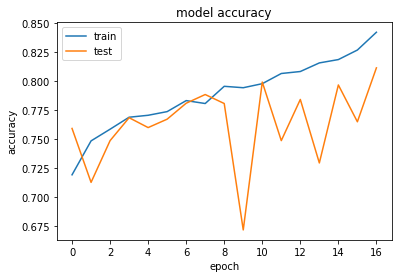

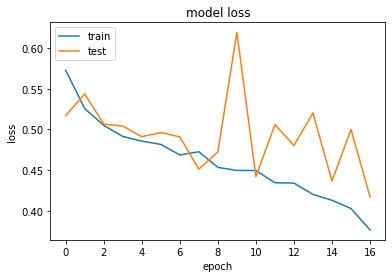

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model 3
Add dropout to reduce variance

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(64,64,3)))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='sigmoid'))

model.add(Dropout(0.2))
model.add(Dense(4 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam' ,
              metrics=['accuracy'])

print(model.summary())

In [0]:
batch_size = 128
epochs = 60

model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])
steps_per_epoch = len(X_train) // batch_size
validation_steps = len((X_crossval, Y_crossval)) // batch_size

In [0]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    callbacks=[lr_reduce, chkpt],
                    validation_data=(X_crossval, Y_crossval),
                    epochs = epochs, verbose = 2)

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Learning Rate **Scheduler**

In [0]:
def step_decay(epoch):
   initial_lrate = 0.1
   drop = 0.5
   epochs_drop = 10.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate
lrate = LearningRateScheduler(step_decay)

Model 4

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(64,64,3)))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='sigmoid'))

model.add(Dropout(0.2))
model.add(Dense(4 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam' ,
              metrics=['accuracy'])

print(model.summary())

In [0]:
batch_size = 128
epochs = 60

model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])
steps_per_epoch = len(X_train) // batch_size
validation_steps = len((X_crossval, Y_crossval)) // batch_size

In [0]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    callbacks=[lr_reduce, chkpt],
                    validation_data=(X_crossval, Y_crossval),
                    epochs = epochs, verbose = 2)

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
for i in model.predict(X_crossval[:10]):
  print(np.argmax( i))

In [0]:
id_to_label[3]

In [0]:
np.argmax( Y_crossval[1])

In [0]:
import matplotlib.pyplot as plt

In [0]:

plt.imshow(X_crossval[1])
plt.show()

The second model train has the lowest difference between the train and validation loss which indicates good generalization. Hence using this for final submission


In [0]:
%tensorflow_version 1.x 

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(64,64,3)))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='sigmoid'))

model.add(Dropout(0.4))
model.add(Dense(4 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam' ,
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)       

In [0]:
batch_size = 128
epochs = 17

model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])
steps_per_epoch = len(X_train) // batch_size
validation_steps = len((X_crossval, Y_crossval)) // batch_size

In [0]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    callbacks=[lr_reduce],
                    validation_data=(X_crossval, Y_crossval),
                    epochs = epochs, verbose = 2)

Epoch 1/17
 - 5s - loss: 0.5749 - acc: 0.7184 - val_loss: 0.5169 - val_acc: 0.7595
Epoch 2/17
 - 4s - loss: 0.5265 - acc: 0.7483 - val_loss: 0.5436 - val_acc: 0.7130
Epoch 3/17
 - 4s - loss: 0.5063 - acc: 0.7570 - val_loss: 0.5064 - val_acc: 0.7490
Epoch 4/17
 - 4s - loss: 0.4911 - acc: 0.7685 - val_loss: 0.5042 - val_acc: 0.7687
Epoch 5/17
 - 4s - loss: 0.4872 - acc: 0.7696 - val_loss: 0.4910 - val_acc: 0.7603
Epoch 6/17
 - 4s - loss: 0.4819 - acc: 0.7733 - val_loss: 0.4962 - val_acc: 0.7675
Epoch 7/17
 - 4s - loss: 0.4682 - acc: 0.7842 - val_loss: 0.4908 - val_acc: 0.7813
Epoch 8/17
 - 4s - loss: 0.4726 - acc: 0.7806 - val_loss: 0.4511 - val_acc: 0.7887
Epoch 9/17
 - 4s - loss: 0.4535 - acc: 0.7950 - val_loss: 0.4723 - val_acc: 0.7810
Epoch 10/17
 - 4s - loss: 0.4496 - acc: 0.7947 - val_loss: 0.6193 - val_acc: 0.6720
Epoch 11/17
 - 4s - loss: 0.4496 - acc: 0.7986 - val_loss: 0.4419 - val_acc: 0.7995
Epoch 12/17
 - 4s - loss: 0.4349 - acc: 0.8059 - val_loss: 0.5058 - val_acc: 0.7490
E

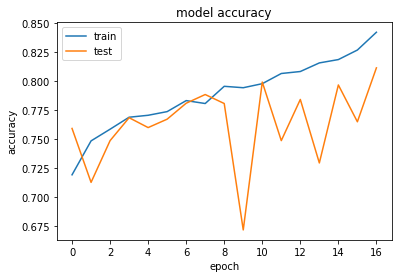

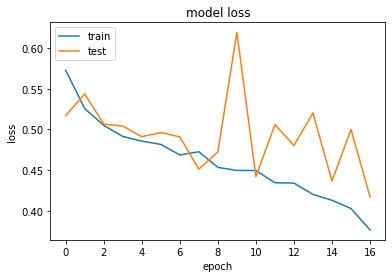

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
test_labels = []
for i in model.predict(test):
  test_labels.append(id_to_label[np.argmax( i)])

In [0]:
test_labels

['Attire',
 'Decorationandsignage',
 'misc',
 'Food',
 'misc',
 'Attire',
 'Food',
 'Attire',
 'Attire',
 'Food',
 'Food',
 'Attire',
 'Attire',
 'Decorationandsignage',
 'Food',
 'Attire',
 'Food',
 'misc',
 'Food',
 'Attire',
 'Food',
 'Attire',
 'Food',
 'Decorationandsignage',
 'Decorationandsignage',
 'Decorationandsignage',
 'Food',
 'misc',
 'Food',
 'Attire',
 'Attire',
 'Attire',
 'Food',
 'Attire',
 'misc',
 'Attire',
 'Attire',
 'Attire',
 'Decorationandsignage',
 'misc',
 'Food',
 'Food',
 'Decorationandsignage',
 'Decorationandsignage',
 'Attire',
 'Attire',
 'Attire',
 'misc',
 'Decorationandsignage',
 'Attire',
 'Food',
 'Decorationandsignage',
 'Food',
 'Food',
 'Attire',
 'Food',
 'Attire',
 'Attire',
 'Food',
 'Food',
 'misc',
 'Attire',
 'Attire',
 'Attire',
 'Attire',
 'Decorationandsignage',
 'Food',
 'Food',
 'misc',
 'Food',
 'Attire',
 'misc',
 'Attire',
 'misc',
 'Decorationandsignage',
 'misc',
 'Attire',
 'Attire',
 'Attire',
 'misc',
 'Attire',
 'Decorationa

In [0]:
len(test_labels)

983

In [0]:
len(test_df)

983

In [0]:
test_df['Class'] = test_labels

In [0]:
print(test_df)

             Image                 Class
0    image4703.jpg                Attire
1    image8371.jpg  Decorationandsignage
2    image8308.jpg                  misc
3    image6299.jpg                  Food
4    image2364.jpg                  misc
..             ...                   ...
978  image2494.jpg                  Food
979  image8015.jpg                Attire
980  image4975.jpg                  Food
981  image1222.jpg                  Food
982  image9635.jpg                Attire

[983 rows x 2 columns]
